In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Merging all 12 month data in one file 

In [2]:
import os
path ="C:\\Users\\RAJINDER SINGH\\Desktop\\pandas\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"
month_data = os.listdir(path)
files = pd.read_csv(path+month_data[0])
df = pd.DataFrame(files)
for i in range(1,len(month_data)):
    file = pd.read_csv(path+month_data[i])
    df = pd.concat([df,file])
df.head()
df.to_csv("All_month_data.csv",index=False)

### Read the updated dataframe

In [3]:
data = pd.read_csv("All_month_data.csv")
# df = pd.DataFrame(data)
# df.drop(df.index[1],inplace=True)
# df.reset_index(drop=True,inplace=True)
# df.head(5)
data.shape

(186850, 6)

### Cleaning up the data

In [8]:
l = df[df["Order Date"].isna()==True]
for index,rows in l.iterrows():
    df.drop(index,inplace=True)
df[df["Order Date"].isna() == True]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
# df.drop('Month',axis=True,inplace=True);

### ADDING MONTH COLUMN AND CONVERTING MONTH INTO INT DATATYPE

In [15]:
or_removal = df[df["Quantity Ordered"].str.contains("Or")]
for index,rows in or_removal.iterrows():
    df.drop(index,inplace=True)
df["Quantity Ordered"].str.contains("Or").head(50);
# df["Month"] = df["Order Date"].apply(lambda x:x.split("/")[0])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [20]:
# df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
# df["Price Each"] = df["Price Each"].astype("float32")
# df["sale"] = (df["Quantity Ordered"] * df["Price Each"]).astype("int32")
# df.rename(columns={"sale":"sales(in $)"},inplace=True)
df.head()
# # df.drop("sales",axis=1,inplace=True)
# # cols = list(df.columns)
# # df = df[cols[0:4] + cols[-1] + cols[4:9]]
# df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales(in $)
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11


In [22]:
df.head(4);

In [23]:
# df.drop("sale",axis=1,inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales(in $)
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11


### Best month for sales and money earned.

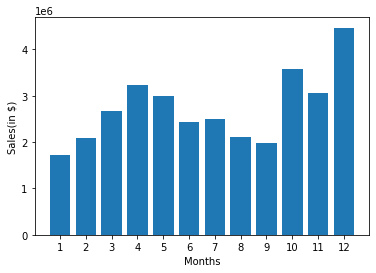

In [24]:
sales = df.groupby("Month").sum()
sales
a =np.arange(1,13,1)
plt.bar(a,sales["sales(in $)"])
plt.xticks(np.arange(1,13))
plt.xlabel("Months")
plt.ylabel("Sales(in $)")
plt.show()

### WHICH CITIES HAD THE HIGHEST NUMBER OF SALES

In [25]:
# df.head()
def city(x):
    return x.split(",")[1]
def address(x):
    return x.split(",")[2].split(" ")[1]
df["City"] = df["Purchase Address"].apply(lambda x:f"{city(x)} {address(x)}")
df.head()
city_sale = df.groupby("City").sum()
city_sale

,Quantity Ordered,Price Each,sales(in $)
City,,,
Atlanta GA,15860,2.648143e+06,2652793
Austin TX,10659,1.728854e+06,1731121
Boston MA,21484,3.482988e+06,3491939
Dallas TX,16051,2.634400e+06,2638826
Los Angeles CA,31810,5.176472e+06,5184835
New York City NY,26714,4.430062e+06,4440355
Portland ME,2606,4.303674e+05,430973
Portland OR,10814,1.770446e+06,1772803
San Francisco CA,48073,7.835830e+06,7853052


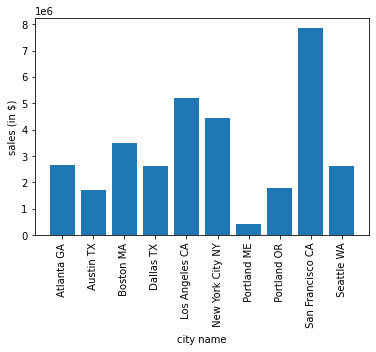

In [60]:
cities = df["City"].unique()
# cities = np.sort(cities)
cities = [city for city,df in df.groupby("City")]
plt.bar(cities,city_sale["sales(in $)"]) 
plt.xticks(cities,rotation="vertical")
plt.xlabel("city name")
plt.ylabel("sales (in $)")
plt.show()

### At what time should we show advertisment to maximise the sales

In [27]:
df["time"] = df["Order Date"].apply(lambda x:x.split(" ")[1].split(":")[0]).astype("int32")
# df.head()
# df["time"].unique()
hr_time = df.groupby("time").sum()
hr_time;
c = df.groupby("time").count()
c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales(in $),City
time,,,,,,,,,
0,3750,3750,3750,3750,3750,3750,3750,3750,3750
1,2250,2250,2250,2250,2250,2250,2250,2250,2250
2,1197,1197,1197,1197,1197,1197,1197,1197,1197
3,798,798,798,798,798,798,798,798,798
4,815,815,815,815,815,815,815,815,815


### Plotting Time

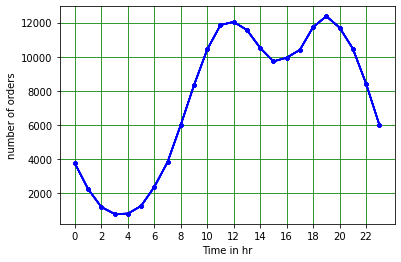

In [28]:
time = [time for time,df in df.groupby("time")]
plt.plot(time,df.groupby("time").count(),"b.-")
plt.xlabel("Time in hr")
plt.ylabel("number of orders")
plt.xticks(np.arange(0,24,2))
plt.grid(True,color="green")
plt.show()

### For specific city

In [29]:
San_Francisco=df[df.City.str.contains("San Francisco CA")]
hr = San_Francisco.groupby("time").sum()
hr;
# time = [time for time,df in San_Francisco.groupby("time")]

### Plot for San Francisco

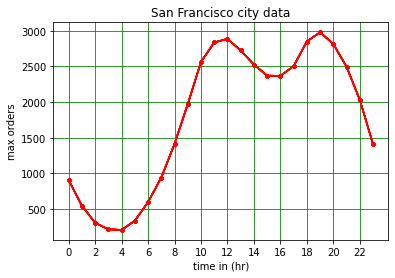

In [30]:
plt.plot(time,San_Francisco.groupby("time").count(),"r.-")
plt.xlabel("time in (hr)")
plt.ylabel("max orders")
plt.title("San Francisco city data")
plt.xticks(np.arange(0,24,2))
plt.grid(True,color="green")
plt.show()

### What products are sold often together

In [33]:
dupli = df[df["Order ID"].duplicated(keep=False)]
dupli["Grouped"] = dupli.groupby("Order ID")['Product'].transform(lambda x:",".join(x))
dupli = dupli[["Order ID","Grouped"]].drop_duplicates()
dupli.head()

c:\python3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [49]:
from collections import Counter
from itertools import combinations
count = Counter()
for rows in dupli["Grouped"]:
    row_list = rows.split(",")
    count.update(Counter(combinations(row_list,2)))
# print(count)
count.most_common(10);
for key,value in count.items():
    print(f"{key}:{value}")

('Google Phone', 'Wired Headphones'):377
('Google Phone', 'USB-C Charging Cable'):915
('Bose SoundSport Headphones', 'Bose SoundSport Headphones'):27
('AAA Batteries (4-pack)', 'Google Phone'):11
('Lightning Charging Cable', 'USB-C Charging Cable'):53
('Apple Airpods Headphones', 'ThinkPad Laptop'):9
('34in Ultrawide Monitor', 'Google Phone'):2
('iPhone', 'Lightning Charging Cable'):913
('Google Phone', 'Bose SoundSport Headphones'):209
('Bose SoundSport Headphones', 'Wired Headphones'):50
('AAA Batteries (4-pack)', '27in FHD Monitor'):18
('USB-C Charging Cable', 'AAA Batteries (4-pack)'):43
('iPhone', 'Wired Headphones'):414
('iPhone', '27in 4K Gaming Monitor'):6
('ThinkPad Laptop', 'AAA Batteries (4-pack)'):14
('iPhone', 'Apple Airpods Headphones'):328
('iPhone', 'AAA Batteries (4-pack)'):13
('Apple Airpods Headphones', 'AAA Batteries (4-pack)'):41
('Wired Headphones', 'Apple Airpods Headphones'):28
('Macbook Pro Laptop', 'ThinkPad Laptop'):3
('AA Batteries (4-pack)', 'Flatscreen TV'

In [40]:
df.reset_index(drop=True,inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales(in $),City,time
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99,Boston MA,22
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600,Los Angeles CA,14
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11,Los Angeles CA,14
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11,Los Angeles CA,9


### What product sold the most

In [75]:
product_sold = df.groupby("Product").sum()
# product_sold["Quantity Ordered"]
# product_sold.loc[(product_sold["Quantity Ordered"]>29000) & (product_sold["sales(in $)"]>69000) ]
product_sold.head()

,Quantity Ordered,Price Each,sales(in $),time
Product,,,,
20in Monitor,3949,431490.750,430467,56240
27in 4K Gaming Monitor,5965,2321610.500,2320397,86615
27in FHD Monitor,7242,1080078.000,1079099,103193
34in Ultrawide Monitor,5917,2241941.000,2242560,84965
AA Batteries (4-pack),26435,75578.875,86056,285488


c:\python3.7\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


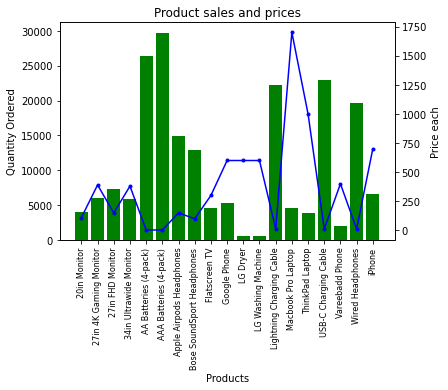

In [103]:
pro = [Product for Product, df in df.groupby("Product")]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
quan = product_sold.iloc[:,0]
ax1.bar(pro,quan,color="Green")
price = df.groupby("Product").mean()["Price Each"]
ax2.plot(pro,price,"b.-")
ax1.set_xticklabels(pro,rotation="vertical",size=8)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price each")
plt.title("Product sales and prices")
plt.show()

In [88]:
df.groupby("Product").mean()["Price Each"]

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32